In [586]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [1024]:
folder_name = '1647004551'
file_nr = '1'

In [1025]:
df = pd.read_csv(f'rawdata/{folder_name}/pulseTS{file_nr}.csv', header=None, names=["value", "ts"])

In [1026]:
# remove small values
df = df.drop(df[df.value < 330].index)

In [1027]:
# number of points to be checked before and after
n = 5 
df['max'] = df.iloc[argrelextrema(df.value.values, np.greater_equal, order=n)[0]]['value']

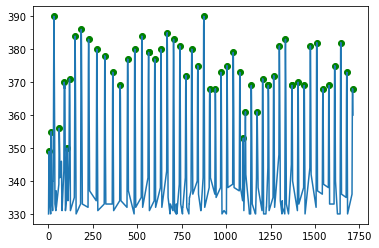

In [1028]:
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['value'])

In [1029]:
df = df.dropna()
df = df.reset_index(drop=True)

## Create second Dataframe

Which is exact copy of a first one, with one extra column on top - we will need it to calculate differences in time between peaks

In [1030]:
data = []
data.insert(0,{'max': 0, 'ts': 0, 'value': 0})
df1 = pd.concat([pd.DataFrame(data), df], ignore_index=True)

## Change second Dataframe size

Currently it's one row longer than first one

In [1031]:
df1 = df1[:-1]


In [1032]:
# calculating the diff
df = df.assign(diff = df['ts'] - df1['ts'])

In [1033]:
# filter out noise
df.drop(df[df['diff'] < 100].index, inplace = True)

In [1034]:
# STD of differences
df['diff'].std()

75.92243203608871